In [ ]:
import librosa
from IPython.display import Audio
import numpy as np

## Amplitude Envelope


In [ ]:
data, sampling_rate = librosa.load("drive/MyDrive/Colab Notebooks/archive/a day in the life 44100.wav")
Audio(data=data, rate=sampling_rate)

### Code

In [ ]:
def get_amplitude_envelope(signal,frame_size,window_size):
  envelope = []
  for i in range(0,len(signal),window_size):
    frame_data = signal[i:i+frame_size]
    max_amp = max(frame_data)
    envelope.append(max_amp)
  return np.array(envelope)

### PLOT

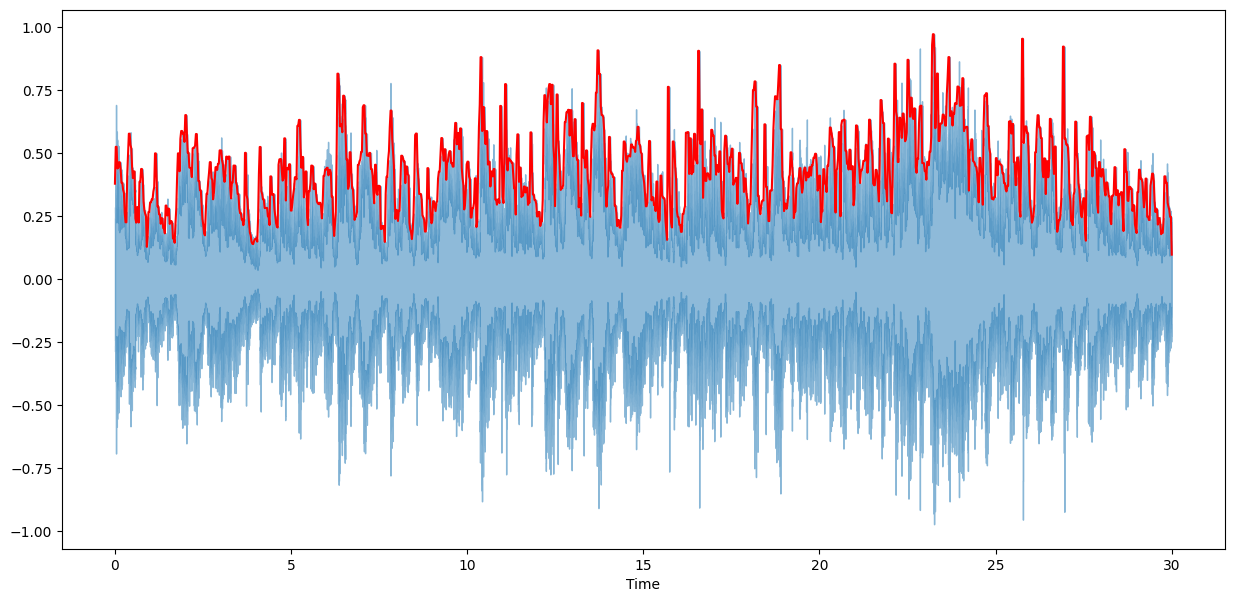

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Get de envelope
amplitude_envelope=get_amplitude_envelope(data,1024,512)
# Frames to time representation
frames = range(0, len(amplitude_envelope))

time = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 7))
librosa.display.waveshow(data, alpha=0.5)
plt.plot(time, amplitude_envelope, color="r")

## RMS

### Code

In [ ]:
def get_rms(signal,frame_size,window_size):
  new_signal = []
  for i in range(0,len(signal),window_size):
    frame_data = signal[i:i+frame_size]
    rmse_val = np.sqrt(1 / len(frame_data) * sum(i**2 for i in frame_data))
    new_signal.append(rmse_val)
  return np.array(new_signal)

### Plot

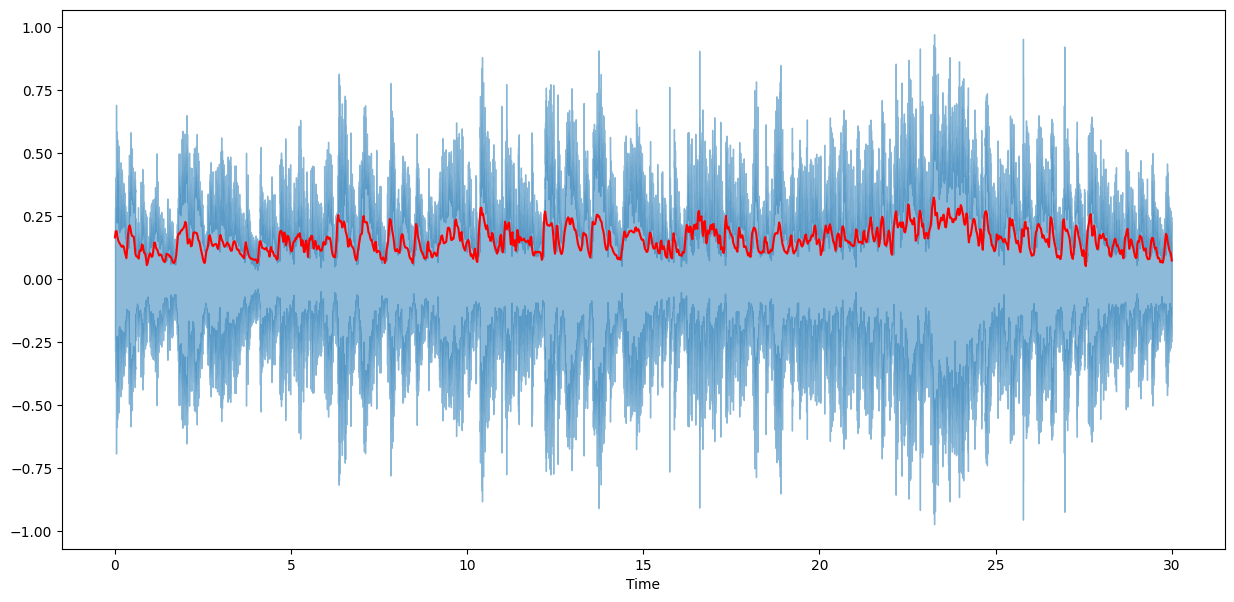

In [ ]:
# Get rms signal
rms=get_rms(data,1024,512)
# Frames to time representation
frames = range(0, len(rms))

time = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 7))
librosa.display.waveshow(data, alpha=0.5)
plt.plot(time, rms, color="r")

## ZCR

In [ ]:
def get_zcr(signal,frame_size,window_size):
  new_signal = []
  for i in range(0,len(signal),window_size):
    frame_data = signal[i:i+frame_size]
    res = 0
    for i in range(0, len(frame_data) - 1):
        if (frame_data[i] * frame_data[i + 1] < 0):
            res += 1
    new_signal.append(res)
  return np.array(new_signal)

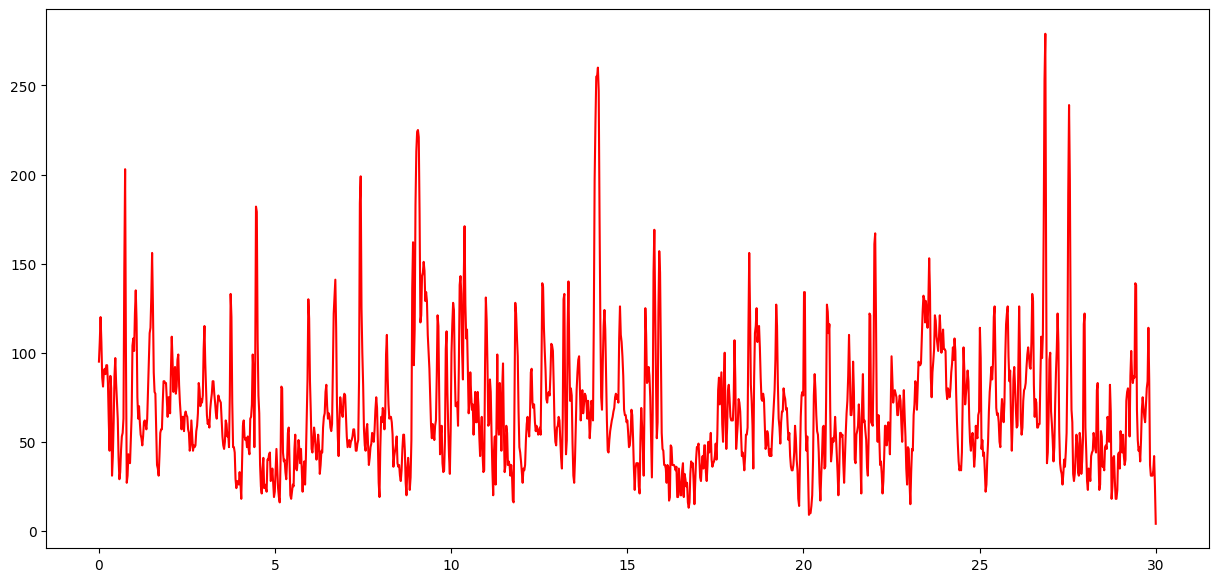

In [ ]:
# Get zcr signal
zcr=get_zcr(data,1024,512)
# Frames to time representation
frames = range(0, len(zcr))

time = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 7))
plt.plot(time, zcr, color="r")